In [2]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

In [3]:
# Constants ? from the Table 2 
FMC = 0.25 # NOT USED
H = 2 
T_A = 300.0 #interpreting as outside Temperature ~25°C
T_MAX_I = 1200.0 # interpreting as hottest possible wildfire ~927°C
RHO_G = 1
RHO_S = 700
C_PG = 1043
C_PS = 1800
C_S1 = 30
C_S2 = 40
B_1 = 4500
B_2 = 7000
A_1 = 22 * 10**5
A_2 = 2 * 10**7
D_RB = 0.1
R_M_0 = 0.002
R_M_C = 0.004
GAMMA_D = 0.03
SIGMA = 20 # NOT USED
A_NC = 0.2
A_D = 0.125
ETA = 3
ALPHA = 0.002
EPSILON = 0.2
GAMMA = C_PG/C_PS
LAMBDA = RHO_G/RHO_S
C_2 = ALPHA*A_1/C_PS
C_3 = ALPHA*A_2/C_PS
C_4 = 1/(H*RHO_S*C_PS)
KAPPA = 0.41 # Karman's Konstant
SIGMA_B = 5.67*10**(-8) # Stefan-Boltzmann Constant

In [4]:
# Dimensionend der Einheiten
dt = 0.1 # length of time steps from paper in seconds
dx = 0.5 # length of a "pixel" from paper in m

In [ ]:
#s\in[0,1]
def calc_c_0(s):
    return ALPHA*s + (1-ALPHA)*LAMBDA*GAMMA + ALPHA*GAMMA*(1-s)

#s\in[0,1]
def calc_c_1(s):
    return ALPHA*s + (1-ALPHA)*LAMBDA*GAMMA + ALPHA*GAMMA*(1-s)-ALPHA*s

#t\in[0,1500]
def calc_dS_1(t, s1=0.2):
    r_1 = C_S1*np.exp(-B_1/t)
    return s1*r_1*dt

#t\in[0,1500]
def calc_dS_2(t, s2=0.8, avg_u=3):
    r_2 = C_S2*np.exp(-B_2/t)
    r_m = R_M_0+R_M_C*(avg_u-1)
    r_2t = (r_2*r_m)/(r_2+r_m)
    return s2*r_2t*dt

#t\in[0,1500]
def calc_U(t):
    return A_NC*np.power(t-T_A, 1/3)+EPSILON*SIGMA_B*(np.power(t,2)+T_A**2)*(t+T_A)

Text(0.5, 1.0, 'Variable $c_0$ in relation to $S$')

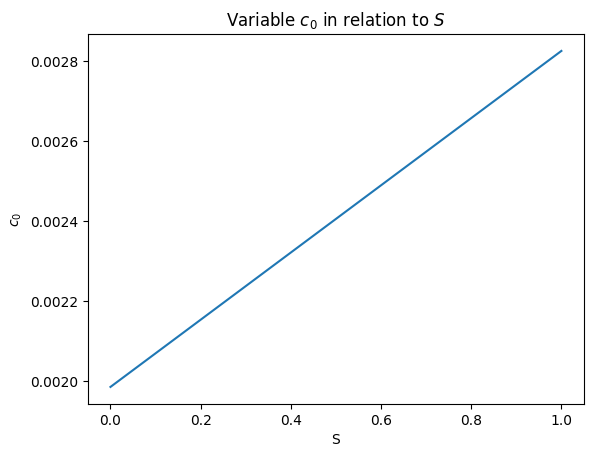

In [6]:
s = np.array(range(101))/100
c0 = calc_c_0(s)
plt.plot(s,c0)
plt.xlabel("S")
plt.ylabel("$c_0$")
plt.title("Variable $c_0$ in relation to $S$")

Text(0.5, 1.0, 'Variable $c_1$ in relation to $S$')

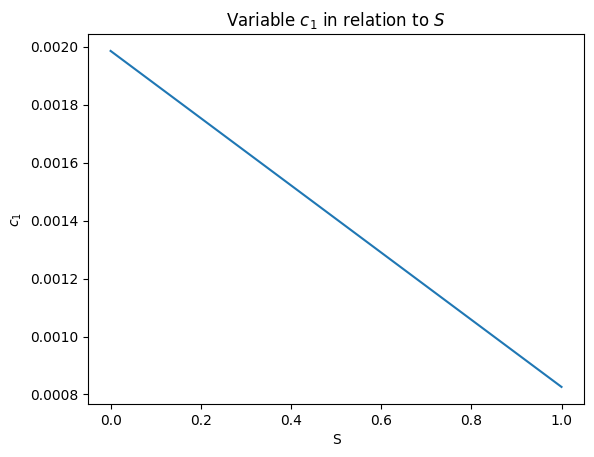

In [7]:
s = np.array(range(101))/100
c1 = calc_c_1(s)
plt.plot(s,c1)
plt.xlabel("S")
plt.ylabel("$c_1$")
plt.title("Variable $c_1$ in relation to $S$")

C:\Users\malin\AppData\Local\Temp\ipykernel_35732\3134789843.py:11: RuntimeWarning: divide by zero encountered in divide
  r_1 = C_S1*np.exp(-B_1/t)


Text(0.5, 1.0, 'change of remaining fuell mass fraction of water $S_1$ in relation to Temperature $T$')

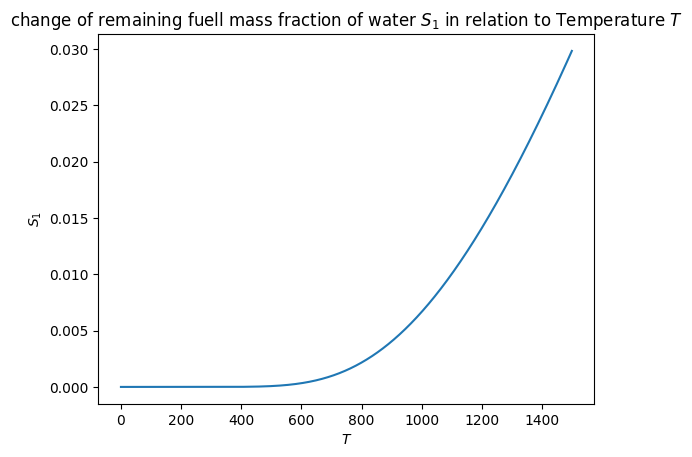

In [8]:
t = np.array(range(1500))
ds1 = calc_dS_1(t,)
plt.plot(t,ds1)
plt.xlabel("$T$")
plt.ylabel("$S_1$")
plt.title("change of remaining fuell mass fraction of water $S_1$ in relation to Temperature $T$")

C:\Users\malin\AppData\Local\Temp\ipykernel_35732\3134789843.py:11: RuntimeWarning: divide by zero encountered in divide
  r_1 = C_S1*np.exp(-B_1/t)


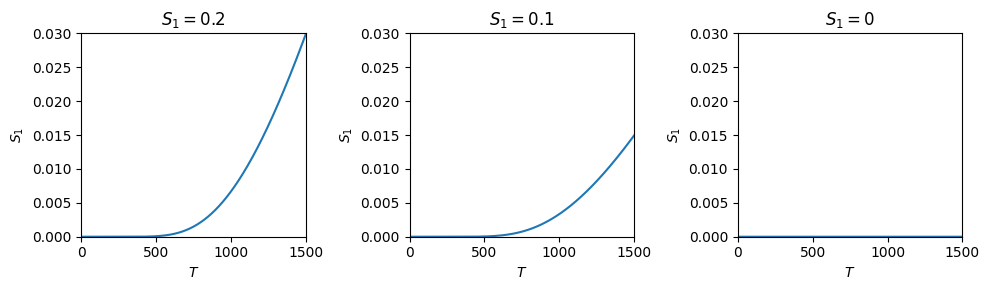

In [9]:
t = np.array(range(1500))
ds1 = calc_dS_1(t)
ds10 = calc_dS_1(t, s1=0)
ds1m = calc_dS_1(t, s1=0.1)

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
ax = axes.ravel()
ax[0].plot(t,ds1)
ax[0].set_xlabel("$T$")
ax[0].set_ylabel("$S_1$")
ax[0].set_title("$S_1=0.2$")
ax[0].set_ylim([0,0.03])
ax[0].set_xlim([0,1500])
ax[1].plot(t,ds1m)
ax[1].set_xlabel("$T$")
ax[1].set_ylabel("$S_1$")
ax[1].set_title("$S_1=0.1$")
ax[1].set_ylim([0,0.03])
ax[1].set_xlim([0,1500])
ax[2].plot(t,ds10)
ax[2].set_xlabel("$T$")
ax[2].set_ylabel("$S_1$")
ax[2].set_title("$S_1=0$")
ax[2].set_ylim([0,0.03])
ax[2].set_xlim([0,1500])

#plt.title("change of remaining fuell mass fraction of water $S_1$ in relation to Temperature $T$")


fig.tight_layout()
plt.show()

C:\Users\malin\AppData\Local\Temp\ipykernel_35732\3134789843.py:16: RuntimeWarning: divide by zero encountered in divide
  r_2 = C_S2*np.exp(-B_2/t)


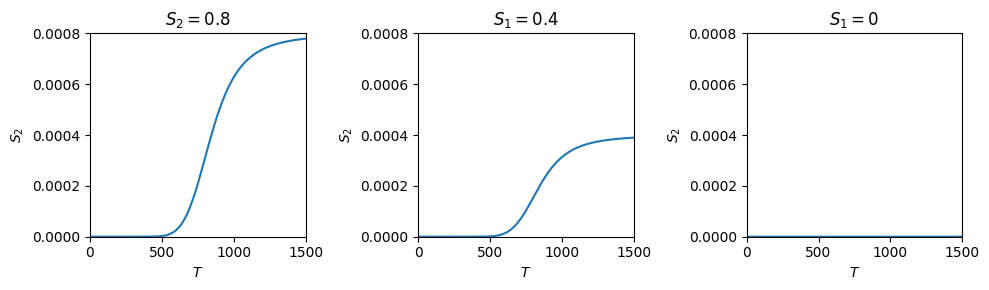

In [13]:
t = np.array(range(1500))
ds2 = calc_dS_2(t)
ds20 = calc_dS_2(t, s2=0)
ds2m = calc_dS_2(t, s2=0.4)

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
ax = axes.ravel()
ax[0].plot(t,ds2)
ax[0].set_xlabel("$T$")
ax[0].set_ylabel("$S_2$")
ax[0].set_title("$S_2=0.8$")
ax[0].set_ylim([0,0.0008])
ax[0].set_xlim([0,1500])
ax[1].plot(t,ds2m)
ax[1].set_xlabel("$T$")
ax[1].set_ylabel("$S_2$")
ax[1].set_title("$S_1=0.4$")
ax[1].set_ylim([0,0.0008])
ax[1].set_xlim([0,1500])
ax[2].plot(t,ds20)
ax[2].set_xlabel("$T$")
ax[2].set_ylabel("$S_2$")
ax[2].set_title("$S_1=0$")
ax[2].set_ylim([0,0.0008])
ax[2].set_xlim([0,1500])

#plt.title("change of remaining fuell mass fraction of water $S_1$ in relation to Temperature $T$")


fig.tight_layout()
plt.show()

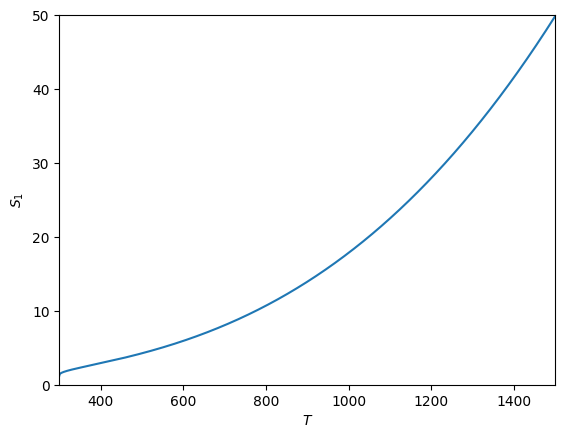

In [20]:
t = 300+np.array(range(1500-300))
u = calc_U(t)

plt.plot(t,u)
plt.xlabel("$T$")
plt.ylabel("$S_1$")
plt.ylim([0,50])
plt.xlim([300,1500])

#plt.title("change of remaining fuell mass fraction of water $S_1$ in relation to Temperature $T$")

plt.show()